In [1]:
import csv
import math

In [2]:
import psycopg2

In [4]:
#"select code,name,region,continent from country where code = %s"
       

In [5]:
conn = psycopg2.connect("postgresql://kaneel01:@localhost/world")
with open("/home/faculty/millbr02/pub/un-general-debates.csv",'r',encoding ='latin-1') as undata:
    reader = csv.reader(undata)
    db = []
    for row in reader:
        cur = conn.cursor()
        cur.execute("select code,name,region,continent from country where code = %s", [row[2]])
        res = cur.fetchone()
        db.append(res)
    print(db)
#for row in res:
#    print(row)

[None, ('MDV', 'Maldives', 'Southern and Central Asia', 'Asia'), ('FIN', 'Finland', 'Nordic Countries', 'Europe'), ('NER', 'Niger', 'Western Africa', 'Africa'), ('URY', 'Uruguay', 'South America', 'South America'), ('ZWE', 'Zimbabwe', 'Eastern Africa', 'Africa'), ('PHL', 'Philippines', 'Southeast Asia', 'Asia'), ('SDN', 'Sudan', 'Northern Africa', 'Africa'), ('RUS', 'Russian Federation', 'Eastern Europe', 'Europe'), ('CHN', 'China', 'Eastern Asia', 'Asia'), ('ESP', 'Spain', 'Southern Europe', 'Europe'), ('SUR', 'Suriname', 'South America', 'South America'), ('ARG', 'Argentina', 'South America', 'South America'), ('SLV', 'El Salvador', 'Central America', 'North America'), ('MYS', 'Malaysia', 'Southeast Asia', 'Asia'), ('NPL', 'Nepal', 'Southern and Central Asia', 'Asia'), ('PRT', 'Portugal', 'Southern Europe', 'Europe'), ('COL', 'Colombia', 'South America', 'South America'), ('BLR', 'Belarus', 'Eastern Europe', 'Europe'), ('MAR', 'Morocco', 'Northern Africa', 'Africa'), ('LCA', 'Saint L

In [6]:
# first just create an in-memory list that contains all of the csv data
with open("/home/faculty/millbr02/pub/un-general-debates.csv",'r',encoding ='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

unknown_country = []  
for row in db[1:]:   # skip the first row
    cur.execute("select code, name, region, continent from country where code = %s", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
    else:
        print("No Entry for {}".format(row[2]))
        unknown_country.append(row[2])

No Entry for YDYE
No Entry for CSK
No Entry for ROU
No Entry for DDR
No Entry for EU
No Entry for TLS
No Entry for MNE
No Entry for ROU
No Entry for SSD
No Entry for ROU
No Entry for DDR
No Entry for CSK
No Entry for YDYE
No Entry for MNE
No Entry for ROU
No Entry for TLS
No Entry for ROU
No Entry for CSK
No Entry for CSK
No Entry for ROU
No Entry for YDYE
No Entry for DDR
No Entry for ROU
No Entry for CSK
No Entry for ROU
No Entry for DDR
No Entry for YDYE
No Entry for ROU
No Entry for ROU
No Entry for SSD
No Entry for MNE
No Entry for EU
No Entry for TLS
No Entry for ROU
No Entry for YDYE
No Entry for ROU
No Entry for CSK
No Entry for DDR
No Entry for DDR
No Entry for ROU
No Entry for CSK
No Entry for YDYE
No Entry for TLS
No Entry for MNE
No Entry for ROU
No Entry for DDR
No Entry for YDYE
No Entry for CSK
No Entry for ROU
No Entry for ROU
No Entry for ROU
No Entry for MNE
No Entry for TLS
No Entry for CSK
No Entry for YDYE
No Entry for ROU
No Entry for YDYE
No Entry for CSK
No Entr

In [7]:
set(unknown_country)

{'CSK', 'DDR', 'EU', 'MNE', 'ROU', 'SSD', 'TLS', 'YDYE'}

In [8]:
# first just create an in-memory list that contains all of the csv data
with open("/home/faculty/millbr02/pub/un-general-debates.csv",'r',encoding ='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

unknown_country = []  
other_countries = {
    'CSK': ['Czecholslovakia','Europe','Eastern Europe'],
    'DDR':['East Germany','Europe','Western Europe'],
    'EU':['European Union','Europe','Western Europe' ],
    'MNE':['Montenegro','Europe','Eastern Europe'],
    'ROU':['Romania','Europe','Eastern Europe'],
    'SSD':['South Sudan','Africa','North Africa'],
    'TLS':['East Timor', 'Asia', 'Southeast Asia'],
    'YDYE':['Democratic Yemen','Asia','Middle East'],}
for row in db[1:]:   # skip the first row
    cur.execute("select code, name, region, continent from country where code = %s", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
    else:
        print("No Entry for {}".format(row[2]))
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])  # name
        row.append(other_countries[row[2]][2])  # region
        row.append(other_countries[row[2]][1])  # continent

No Entry for YDYE
No Entry for CSK
No Entry for ROU
No Entry for DDR
No Entry for EU
No Entry for TLS
No Entry for MNE
No Entry for ROU
No Entry for SSD
No Entry for ROU
No Entry for DDR
No Entry for CSK
No Entry for YDYE
No Entry for MNE
No Entry for ROU
No Entry for TLS
No Entry for ROU
No Entry for CSK
No Entry for CSK
No Entry for ROU
No Entry for YDYE
No Entry for DDR
No Entry for ROU
No Entry for CSK
No Entry for ROU
No Entry for DDR
No Entry for YDYE
No Entry for ROU
No Entry for ROU
No Entry for SSD
No Entry for MNE
No Entry for EU
No Entry for TLS
No Entry for ROU
No Entry for YDYE
No Entry for ROU
No Entry for CSK
No Entry for DDR
No Entry for DDR
No Entry for ROU
No Entry for CSK
No Entry for YDYE
No Entry for TLS
No Entry for MNE
No Entry for ROU
No Entry for DDR
No Entry for YDYE
No Entry for CSK
No Entry for ROU
No Entry for ROU
No Entry for ROU
No Entry for MNE
No Entry for TLS
No Entry for CSK
No Entry for YDYE
No Entry for ROU
No Entry for YDYE
No Entry for CSK
No Entr

In [9]:

years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1

In [10]:
for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])

1970 Australia and New Zealand 2
1970 British Islands 1
1970 Caribbean 4
1970 Central Africa 2
1970 Central America 5
1970 Eastern Africa 5
1970 Eastern Asia 1
1970 Eastern Europe 2
1970 Middle East 6
1970 Nordic Countries 2
1970 North America 2
1970 Northern Africa 5
1970 South America 9
1970 Southeast Asia 6
1970 Southern Africa 1
1970 Southern Europe 3
1970 Southern and Central Asia 4
1970 Western Africa 6
1970 Western Europe 4
1971 Australia and New Zealand 2
1971 British Islands 2
1971 Caribbean 5
1971 Central Africa 6
1971 Central America 5
1971 Eastern Africa 10
1971 Eastern Asia 3
1971 Eastern Europe 6
1971 Melanesia 1
1971 Middle East 11
1971 Nordic Countries 4
1971 North America 2
1971 Northern Africa 6
1971 South America 11
1971 Southeast Asia 8
1971 Southern Africa 1
1971 Southern Europe 6
1971 Southern and Central Asia 6
1971 Western Africa 13
1971 Western Europe 5
1972 Australia and New Zealand 2
1972 British Islands 2
1972 Caribbean 5
1972 Central Africa 6
1972 Central A

1990 Melanesia 4
1990 Middle East 14
1990 Nordic Countries 5
1990 North America 2
1990 Northern Africa 6
1990 Polynesia 1
1990 South America 12
1990 Southeast Asia 9
1990 Southern Africa 4
1990 Southern Europe 7
1990 Southern and Central Asia 9
1990 Western Africa 15
1990 Western Europe 7
1991 Australia and New Zealand 2
1991 Baltic Countries 3
1991 British Islands 2
1991 Caribbean 13
1991 Central Africa 8
1991 Central America 8
1991 Eastern Africa 15
1991 Eastern Asia 5
1991 Eastern Europe 6
1991 Melanesia 4
1991 Micronesia 2
1991 Middle East 14
1991 Nordic Countries 5
1991 North America 2
1991 Northern Africa 6
1991 Polynesia 1
1991 South America 12
1991 Southeast Asia 10
1991 Southern Africa 4
1991 Southern Europe 7
1991 Southern and Central Asia 9
1991 Western Africa 15
1991 Western Europe 7
1992 Australia and New Zealand 2
1992 Baltic Countries 3
1992 British Islands 2
1992 Caribbean 11
1992 Central Africa 8
1992 Central America 8
1992 Eastern Africa 14
1992 Eastern Asia 5
1992 Ea

2009 Melanesia 4
2009 Micronesia 5
2009 Middle East 17
2009 Nordic Countries 5
2009 North America 2
2009 Northern Africa 6
2009 Polynesia 3
2009 South America 12
2009 Southeast Asia 10
2009 Southern Africa 5
2009 Southern Europe 14
2009 Southern and Central Asia 14
2009 Western Africa 16
2009 Western Europe 9
2010 Australia and New Zealand 2
2010 Baltic Countries 3
2010 British Islands 2
2010 Caribbean 13
2010 Central Africa 9
2010 Central America 8
2010 Eastern Africa 15
2010 Eastern Asia 5
2010 Eastern Europe 9
2010 Melanesia 4
2010 Micronesia 5
2010 Middle East 17
2010 Nordic Countries 5
2010 North America 2
2010 Northern Africa 6
2010 Polynesia 3
2010 South America 12
2010 Southeast Asia 10
2010 Southern Africa 5
2010 Southern Europe 14
2010 Southern and Central Asia 12
2010 Western Africa 16
2010 Western Europe 9
2011 Australia and New Zealand 2
2011 Baltic Countries 3
2011 British Islands 2
2011 Caribbean 13
2011 Central Africa 9
2011 Central America 8
2011 Eastern Africa 16
2011

In [11]:
with open("/home/faculty/millbr02/pub/un-debates-augmented-1.csv",'r',encoding ='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)


In [12]:
country = []
code = []
text = []
for row in db[1:]:
    country.append(row[4])
    code.append(row[2])
    text.append(row[3])


In [13]:
c = []
for i in country:
    c.append(0)


In [14]:
matrix1=dict(((a,b),c) for a,b,c in zip(country,country2,c))

NameError: name 'country2' is not defined

In [15]:
matrix = dict(((v, country2[i]), c[i]) for i, v in enumerate(country))

NameError: name 'country2' is not defined

In [16]:
keys=["a", "b", "c"]
key2 = ["d", "e", "f"]
vals=[1, 2, 3]

new_dict={}
for a in key2:
    for key,key2,val in zip(keys,key2,vals):
        new_dict[key,key2]=val

In [17]:
new_dict

{('a', 'd'): 1, ('a', 'f'): 1, ('b', 'e'): 2, ('c', 'f'): 3}

In [18]:
print(len(c))

7507


In [19]:
country_dict ={}
for a in country2:
    for x,y,zero in zip(country,country2,c):
        country_dict[x,a] = zero
print(country_dict)

NameError: name 'country2' is not defined

In [20]:
for row in db[1:]:
    text = row[3]
    country = row[4]
    text_list = text.split(' ')
    for k,v in country_dict:
        for word in text_list:
            if country in k:
                word == v
                country_dict[country][word] = 1
            country_dict[country][word] +=1
print(country_dict)

{}


In [21]:
count = set(country)

In [22]:
len(count)

6

In [23]:
for item in country:
    print(country)

Kuwait
Kuwait
Kuwait
Kuwait
Kuwait
Kuwait


In [14]:
new_dict ={}
country = []
code = []
text = []
key2 = []
value = []
text_list = []
country_freq = {}
with open("/home/faculty/millbr02/pub/un-debates-augmented-1.csv",'r',encoding ='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
        text_list.append(row[4])
for row in db[1:]:
    country.append(row[4])
    code.append(row[2])
    text.append(row[3])
    
for item in country:
    if item not in new_dict:
        new_dict[item]= {}
for i in new_dict:
    new_dict[i] = {x:0 for x in country}
    
    

            

            

In [15]:
new_dict

{'Afghanistan': {'Afghanistan': 0,
  'Albania': 0,
  'Algeria': 0,
  'Andorra': 0,
  'Angola': 0,
  'Antigua and Barbuda': 0,
  'Argentina': 0,
  'Armenia': 0,
  'Australia': 0,
  'Austria': 0,
  'Azerbaijan': 0,
  'Bahamas': 0,
  'Bahrain': 0,
  'Bangladesh': 0,
  'Barbados': 0,
  'Belarus': 0,
  'Belgium': 0,
  'Belize': 0,
  'Benin': 0,
  'Bhutan': 0,
  'Bolivia': 0,
  'Bosnia and Herzegovina': 0,
  'Botswana': 0,
  'Brazil': 0,
  'Brunei': 0,
  'Bulgaria': 0,
  'Burkina Faso': 0,
  'Burundi': 0,
  'Cambodia': 0,
  'Cameroon': 0,
  'Canada': 0,
  'Cape Verde': 0,
  'Central African Republic': 0,
  'Chad': 0,
  'Chile': 0,
  'China': 0,
  'Colombia': 0,
  'Comoros': 0,
  'Congo': 0,
  'Congo, The Democratic Republic of the': 0,
  'Costa Rica': 0,
  'Croatia': 0,
  'Cuba': 0,
  'Cyprus': 0,
  'Czech Republic': 0,
  'Czechoslovakia': 0,
  'CÃ´te dÂ\x92Ivoire': 0,
  'Democratic Yemen': 0,
  'Denmark': 0,
  'Djibouti': 0,
  'Dominica': 0,
  'Dominican Republic': 0,
  'East Germany': 0,
 

In [21]:
for row in db[1:]:
    text = row[3]
    country_speaker = row[4]
    for k in text_list[1:]:
        a = text.count(k)
        new_dict[country_speaker][k] += a


        
            

In [22]:
new_dict['United States']

{'Afghanistan': 3285,
 'Albania': 92,
 'Algeria': 92,
 'Andorra': 0,
 'Angola': 418,
 'Antigua and Barbuda': 0,
 'Argentina': 92,
 'Armenia': 24,
 'Australia': 138,
 'Austria': 46,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 352,
 'Bangladesh': 84,
 'Barbados': 0,
 'Belarus': 230,
 'Belgium': 0,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 46,
 'Bosnia and Herzegovina': 0,
 'Botswana': 40,
 'Brazil': 414,
 'Brunei': 0,
 'Bulgaria': 0,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 840,
 'Cameroon': 41,
 'Canada': 138,
 'Cape Verde': 0,
 'Central African Republic': 42,
 'Chad': 88,
 'Chile': 0,
 'China': 2520,
 'Colombia': 322,
 'Comoros': 0,
 'Congo': 184,
 'Congo, The Democratic Republic of the': 0,
 'Costa Rica': 90,
 'Croatia': 72,
 'Cuba': 874,
 'Cyprus': 1215,
 'Czech Republic': 0,
 'Czechoslovakia': 22,
 'CÃ´te dÂ\x92Ivoire': 0,
 'Democratic Yemen': 0,
 'Denmark': 0,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Germany': 0,
 'East Timor': 91,
 'Ecuad

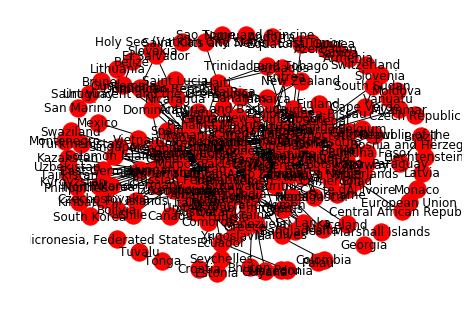

In [30]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
G=nx.Graph()

G.add_nodes_from(new_dict)
for key in new_dict:
    for key2 in new_dict[key]:
        if new_dict[key][key2] > 2000:
            G.add_edge(key,key2)
pos = nx.spring_layout(G)
nx.draw(G, with_labels =True, font_size =12)








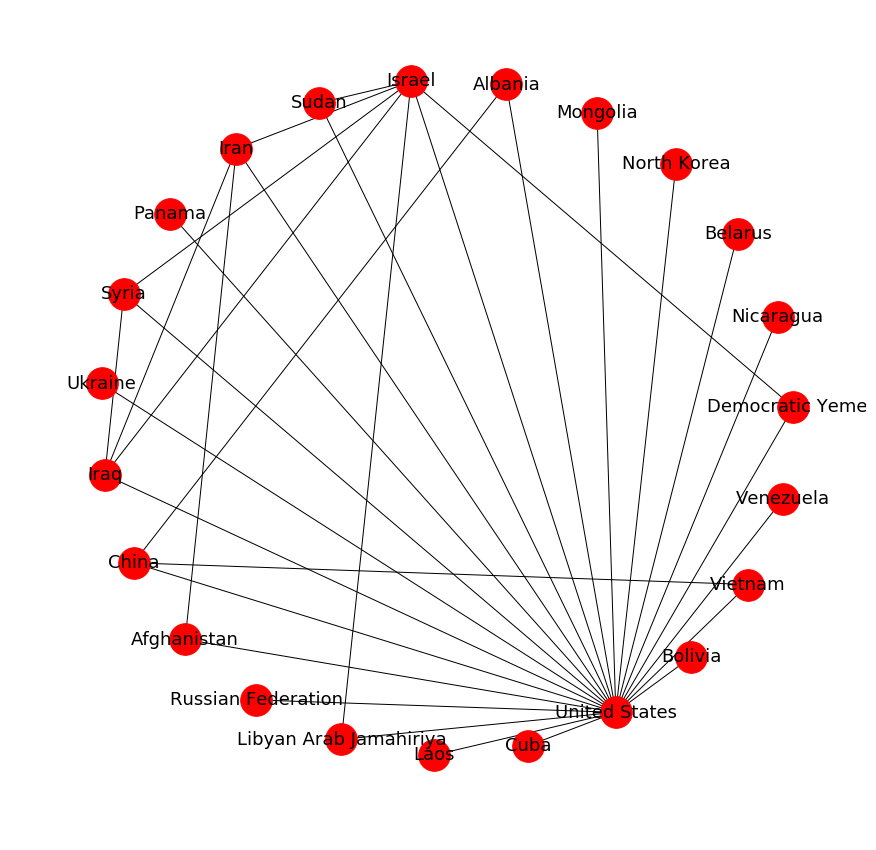

In [29]:
G=nx.Graph()

G.add_nodes_from(new_dict)
for key in new_dict:
    for key2 in new_dict[key]:
        if new_dict[key][key2] > 5000:
            G.add_edge(key,key2)
gfig, gax = plt.subplots(figsize = (15,15))
hego = nx.ego_graph(G,'United States',radius = 1)
pos = nx.spring_layout(hego, k=20*1/math.sqrt(len(new_dict)),scale=8.0, center = (0,0), iterations = (1000))
nx.draw(hego,pos,ax = gax,node_size=1000, with_labels =True, font_size =18)